<h1> Week 8 Practicum</h1>

Didi Chang-Park

In [15]:
# import some things
import os
import pandas as pd
from textblob import TextBlob
pd.set_option("display.max_rows", 20)
import nltk

# Set text folder and metadata path
text_folder = '../corpora/peregrine'
path_to_metadata='../corpora/peregrine/peregrine.csv'

<h3>Set up dataframe </h3> 
<i>Load your metadata file as a pandas dataframe<br>
Show the metadata dataframe <br>
Make an empty "results" list <br>
Loop over your filename column, <br>
Get the full path to the text <br>
Open the text file <br>
Count the number of words in the text <br>
Make an empty "result_dict" dictionary <br>
Add the number of words to that dictionary <br>
Add the filename to that dictionary <br>
Load that results list into a dataframe <br>
Merge that dataframe with your metadata <br>
Show the merged dataframe </i>

In [16]:
# Get the metadata for this corpus
df_meta = pd.read_csv(path_to_metadata).set_index('fn')
df_meta

,book,subtitle,season,unit
fn,,,,
apr-2.txt,the peregrine,NaN,spring,day
apr-3.txt,the peregrine,NaN,spring,day
apr-4.txt,the peregrine,NaN,spring,day
dec-1.txt,the peregrine,NaN,winter,day
dec-10.txt,the peregrine,NaN,winter,day
dec-12.txt,the peregrine,NaN,winter,day
dec-15.txt,the peregrine,NaN,winter,day
dec-17.txt,the peregrine,NaN,winter,day
dec-18.txt,the peregrine,NaN,winter,day


In [17]:
def make_dtm0(text_folder,n_top_words=5000,normalize=False):
    # get stopwords
    from nltk.corpus import stopwords
    stopwords=set(stopwords.words('english'))

    # make an empty results list
    all_results = []

    # make a count for all words
    from collections import Counter
    all_counts = Counter()

    # for each filename
    filenames=sorted(os.listdir(text_folder))
    for i,fn in enumerate(filenames):
        if not i%10: print('>> looping through #',i,'of',len(filenames),'files:',fn)
        # make sure is a text file
        if not fn.endswith('.txt'): continue
        
        # full path
        full_path = os.path.join(text_folder,fn)

        # open the file
        with open(full_path) as file:
            txt=file.read()

        # make a blob
        blob = TextBlob(txt.lower())

        # make a result dictionary
        text_result = {}

        # set the filename
        text_result['fn']=fn

        # loop over the word counts
        num_words = len(blob.words)
        text_result['num words'] = num_words
        # add results
        all_results.append(text_result)

    # Get columns
    columns=[]
    columns.append('fn')
    columns.append('num words')
    
    # Make dataframe
    df = pd.DataFrame(all_results, columns=columns).set_index('fn').fillna(0)
    
    # return dataframe
    return df

In [18]:
# Make the document term matrix
dtm0 = make_dtm0(text_folder,normalize=True)

>> looping through # 0 of 114 files: apr-2.txt
>> looping through # 10 of 114 files: dec-2.txt
>> looping through # 20 of 114 files: dec-8.txt
>> looping through # 30 of 114 files: hill-jul-1.txt
>> looping through # 40 of 114 files: hill-may-4.txt
>> looping through # 50 of 114 files: mar-11.txt
>> looping through # 60 of 114 files: mar-22.txt
>> looping through # 70 of 114 files: mar-7.txt
>> looping through # 80 of 114 files: nov-18.txt
>> looping through # 90 of 114 files: nov-9.txt
>> looping through # 100 of 114 files: oct-24.txt
>> looping through # 110 of 114 files: oct-nov.txt


In [19]:
# Add the metadata
dtm_meta0=df_meta.merge(dtm0,on='fn')
dtm_meta0

,book,subtitle,season,unit,num words
fn,,,,,
apr-2.txt,the peregrine,NaN,spring,day,442
apr-3.txt,the peregrine,NaN,spring,day,807
apr-4.txt,the peregrine,NaN,spring,day,886
dec-1.txt,the peregrine,NaN,winter,day,781
dec-10.txt,the peregrine,NaN,winter,day,554
dec-12.txt,the peregrine,NaN,winter,day,1331
dec-15.txt,the peregrine,NaN,winter,day,923
dec-17.txt,the peregrine,NaN,winter,day,799
dec-18.txt,the peregrine,NaN,winter,day,286


<h2> Practice Most Distinctive Words </h2> 

<i>Replicate the "difference of means" or "tf-idf" sections of the MDW notebook on your own corpus.
To do this, you'll need to make use of a column in your metadata that allows you to make comparisons between vocabulary usage: like a column for "political party", which allows us to ask for which words most distinguish Republican and Democrat presidents. If you don't yet have such a column, please work to create one before uploading your corpus.
Write a brief note, before you begin your analysis, about which words you would expect to distinguish your two groups. At the close of the notebook, please write a follow-up note describing how the data aligned or departed from your expectations. </i>

<h3> Hypotheses </h3>
I expect there to be more mentions of snow and ice in winter, and more mentions of tree, grass, and other kind of vegetation in the spring and fall. The seasons should also distinguish migratory birds. As J.A. Baker writes in the "Peregrines" section of the book, 

> More woodpigeons were killed during the winter I have described in this book, because of their extraordinary abundance in the cold weather, and because of the absence of other inland species at that time. The relative figures for this particular winter are as follows:
Woodpigeon – 54%  <br>
Black-headed gull – 9% <br>
Lapwing – 7% <br>
Wigeon – 3% <br>
Partridge – 3% <br>
Fieldfare – 2% <br>
Moorhen – 2% <br>
Curlew – 2% <br>
Rook – 2% <br>
Mallard – 2% <br>

Baker also mentions black-headed gulls as another popular winter prey.


We also know from this prefatory text that
> In early autumn, and in spring, when days are longer and the air warmer, the peregrine soars higher and hunts over a wider area. In March, when conditions are often ideal for soaring, his range increases, and by long stoops from a great height he is able to kill larger and heavier prey. Cloudy weather means shorter flights at lower levels. Rain curtails the hunting range still further. Fog reduces it to a single field. The shorter the day the more active the hawk, for there is less time available for hunting. All its activities contract or expand with the shortening or lengthening of days on either side of the winter solstice.

Therefore we can expect to see words like "soaring" and "circling," and other words related to high flight, in the fall and spring entries, and especially in march.

<h3> Difference of means </h3>

In [20]:
# Loop over each of the filenames

def make_dtm(text_folder,n_top_words=5000,normalize=False):
    # get stopwords
    from nltk.corpus import stopwords
    stopwords=set(stopwords.words('english'))

    # make an empty results list
    all_results = []

    # make a count for all words
    from collections import Counter
    all_counts = Counter()

    # for each filename
    filenames=sorted(os.listdir(text_folder))
    for i,fn in enumerate(filenames):
        if not i%10: print('>> looping through #',i,'of',len(filenames),'files:',fn)
        # make sure is a text file
        if not fn.endswith('.txt'): continue
        
        # full path
        full_path = os.path.join(text_folder,fn)

        # open the file
        with open(full_path) as file:
            txt=file.read()

        # make a blob
        blob = TextBlob(txt.lower())

        # make a result dictionary
        text_result = {}

        # set the filename
        text_result['fn']=fn

        # loop over the word counts
        num_words = len(blob.words)

        # for each word,count pair in the blob.word_counts dictionary...
        for word,count in blob.word_counts.items():
            # is the word in the stopwords?
            if word in stopwords: continue  

            # is the word a punctuation?
            if not word[0].isalpha(): continue
            
            # set the normalized version
            if normalize:
                # get the term frequency (count divided by number of words)
                tf = count / num_words

                # set the term frequency result to the key 'word' in the text_result dictionary
                text_result[word] = tf
            else:
                # set the count as a result
                text_result[word] = count

            # add the count to the dictionary of counts for all words
            all_counts[word]+=count

        # add results
        all_results.append(text_result)
    
    # Get the most frequent words
    most_common_words_plus_counts = all_counts.most_common(n_top_words)
    
    # Get only the words
    word_columns = []
    for word,count in most_common_words_plus_counts:
        word_columns.append(word)
    
    # Get columns
    columns=[]
    columns.append('fn')
    columns.extend(word_columns)
    
    # Make dataframe
    df = pd.DataFrame(all_results, columns=columns).set_index('fn').fillna(0)
    
    # return dataframe
    return df

In [21]:
# Make the document term matrix
dtm = make_dtm(text_folder,normalize=True)

>> looping through # 0 of 114 files: apr-2.txt
>> looping through # 10 of 114 files: dec-2.txt
>> looping through # 20 of 114 files: dec-8.txt
>> looping through # 30 of 114 files: hill-jul-1.txt
>> looping through # 40 of 114 files: hill-may-4.txt
>> looping through # 50 of 114 files: mar-11.txt
>> looping through # 60 of 114 files: mar-22.txt
>> looping through # 70 of 114 files: mar-7.txt
>> looping through # 80 of 114 files: nov-18.txt
>> looping through # 90 of 114 files: nov-9.txt
>> looping through # 100 of 114 files: oct-24.txt
>> looping through # 110 of 114 files: oct-nov.txt


In [22]:
# Add the metadata
dtm_meta=df_meta.merge(dtm,on='fn')
dtm_meta

,book,subtitle,season_x,unit,like,wings,flew,hawk,sky,away,...,tribes,molten,pondered,shoaled,thinning,cook-a-do,pintail,elegance,narrow-necked,tree-fringed
fn,,,,,,,,,,,,,,,,,,,,,
apr-2.txt,the peregrine,NaN,spring,day,0.006787,0.004525,0.000000,0.000000,0.000000,0.004525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
apr-3.txt,the peregrine,NaN,spring,day,0.007435,0.002478,0.007435,0.001239,0.002478,0.006196,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
apr-4.txt,the peregrine,NaN,spring,day,0.002257,0.003386,0.003386,0.006772,0.005643,0.004515,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dec-1.txt,the peregrine,NaN,winter,day,0.006402,0.006402,0.008963,0.002561,0.006402,0.005122,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dec-10.txt,the peregrine,NaN,winter,day,0.016245,0.000000,0.007220,0.005415,0.003610,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dec-12.txt,the peregrine,NaN,winter,day,0.006011,0.007513,0.009016,0.007513,0.001503,0.002254,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dec-15.txt,the peregrine,NaN,winter,day,0.009751,0.008667,0.006501,0.007584,0.005417,0.002167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dec-17.txt,the peregrine,NaN,winter,day,0.006258,0.007509,0.005006,0.005006,0.006258,0.001252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dec-18.txt,the peregrine,NaN,winter,day,0.013986,0.010490,0.000000,0.000000,0.013986,0.003497,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
dtm_meta.groupby('season_x').mean()

,like,wings,flew,hawk,sky,away,air,peregrine,wind,white,...,tribes,molten,pondered,shoaled,thinning,cook-a-do,pintail,elegance,narrow-necked,tree-fringed
season_x,,,,,,,,,,,,,,,,,,,,,
all,0.007324,0.004616,0.004959,0.004616,0.003662,0.002918,0.002251,0.003777,0.003204,0.002518,...,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019,0.000019
fall,0.007189,0.004426,0.005862,0.004455,0.003823,0.002598,0.001913,0.004474,0.002446,0.002884,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
spring,0.006976,0.003577,0.004047,0.003698,0.002895,0.003099,0.002419,0.003023,0.004026,0.002208,...,0.000018,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038,0.000038
summer,0.008472,0.003825,0.000858,0.001554,0.002896,0.002961,0.004272,0.000000,0.001621,0.003566,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
winter,0.008822,0.005036,0.004368,0.004752,0.003576,0.002468,0.002114,0.004567,0.002781,0.003145,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
round(dtm_meta.groupby('season_x').mean().T * 1000,2)

season_x,all,fall,spring,summer,winter
like,7.32,7.19,6.98,8.47,8.82
wings,4.62,4.43,3.58,3.82,5.04
flew,4.96,5.86,4.05,0.86,4.37
hawk,4.62,4.46,3.70,1.55,4.75
sky,3.66,3.82,2.89,2.90,3.58
away,2.92,2.60,3.10,2.96,2.47
air,2.25,1.91,2.42,4.27,2.11
peregrine,3.78,4.47,3.02,0.00,4.57
wind,3.20,2.45,4.03,1.62,2.78
white,2.52,2.88,2.21,3.57,3.14


In [25]:
dtm_meta_T = dtm_meta.groupby('season_x').mean().T * 1000
dtm_meta_T

season_x,all,fall,spring,summer,winter
like,7.324191,7.188664,6.976223,8.472211,8.821706
wings,4.615766,4.426305,3.577372,3.824522,5.035997
flew,4.959088,5.861501,4.046674,0.858043,4.367672
hawk,4.615766,4.455283,3.698171,1.553938,4.751567
sky,3.662095,3.823459,2.894756,2.896274,3.576209
away,2.918232,2.597541,3.099334,2.960513,2.468433
air,2.250663,1.912870,2.419166,4.271784,2.114389
peregrine,3.776536,4.474117,3.023054,0.000000,4.567183
wind,3.204333,2.445613,4.025649,1.620998,2.781434
white,2.517691,2.884165,2.208087,3.566136,3.144515


In [26]:
dtm_meta_T['S-W']=dtm_meta_T['spring'] - dtm_meta_T['winter']
dtm_meta_T['S-F']=dtm_meta_T['spring'] - dtm_meta_T['fall']
dtm_meta_T['F-W']=dtm_meta_T['fall'] - dtm_meta_T['winter']
dtm_meta_T['F-Su']=dtm_meta_T['fall'] - dtm_meta_T['summer']
dtm_meta_T['W-Su']=dtm_meta_T['winter'] - dtm_meta_T['summer']
dtm_meta_T['S-Su']=dtm_meta_T['spring'] - dtm_meta_T['summer']

round(dtm_meta_T,2)

season_x,all,fall,spring,summer,winter,S-W,S-F,F-W,F-Su,W-Su,S-Su
like,7.32,7.19,6.98,8.47,8.82,-1.85,-0.21,-1.63,-1.28,0.35,-1.50
wings,4.62,4.43,3.58,3.82,5.04,-1.46,-0.85,-0.61,0.60,1.21,-0.25
flew,4.96,5.86,4.05,0.86,4.37,-0.32,-1.81,1.49,5.00,3.51,3.19
hawk,4.62,4.46,3.70,1.55,4.75,-1.05,-0.76,-0.30,2.90,3.20,2.14
sky,3.66,3.82,2.89,2.90,3.58,-0.68,-0.93,0.25,0.93,0.68,-0.00
away,2.92,2.60,3.10,2.96,2.47,0.63,0.50,0.13,-0.36,-0.49,0.14
air,2.25,1.91,2.42,4.27,2.11,0.30,0.51,-0.20,-2.36,-2.16,-1.85
peregrine,3.78,4.47,3.02,0.00,4.57,-1.54,-1.45,-0.09,4.47,4.57,3.02
wind,3.20,2.45,4.03,1.62,2.78,1.24,1.58,-0.34,0.82,1.16,2.40
white,2.52,2.88,2.21,3.57,3.14,-0.94,-0.68,-0.26,-0.68,-0.42,-1.36


In [27]:
round(dtm_meta_T.sort_values('S-W'),2)

season_x,all,fall,spring,summer,winter,S-W,S-F,F-W,F-Su,W-Su,S-Su
snow,1.28,0.13,0.35,0.00,5.62,-5.26,0.23,-5.49,0.13,5.62,0.35
ice,0.48,0.19,0.00,0.04,2.05,-2.05,-0.19,-1.86,0.15,2.01,-0.04
like,7.32,7.19,6.98,8.47,8.82,-1.85,-0.21,-1.63,-1.28,0.35,-1.50
woodpigeons,0.92,0.66,0.51,0.19,2.19,-1.68,-0.16,-1.52,0.48,2.00,0.32
peregrine,3.78,4.47,3.02,0.00,4.57,-1.54,-1.45,-0.09,4.47,4.57,3.02
water,2.21,3.28,1.37,3.63,2.89,-1.52,-1.91,0.39,-0.35,-0.74,-2.26
sun,2.73,2.45,2.55,3.47,4.04,-1.49,0.09,-1.58,-1.01,0.57,-0.92
wings,4.62,4.43,3.58,3.82,5.04,-1.46,-0.85,-0.61,0.60,1.21,-0.25
mud,0.72,0.78,0.50,0.48,1.91,-1.41,-0.28,-1.13,0.30,1.44,0.03
frozen,0.38,0.11,0.00,0.08,1.28,-1.28,-0.11,-1.17,0.03,1.20,-0.08


In [28]:
round(dtm_meta_T.sort_values('W-Su'),2)

season_x,all,fall,spring,summer,winter,S-W,S-F,F-W,F-Su,W-Su,S-Su
air,2.25,1.91,2.42,4.27,2.11,0.30,0.51,-0.20,-2.36,-2.16,-1.85
dark,2.00,2.49,1.94,3.34,1.51,0.43,-0.54,0.97,-0.85,-1.82,-1.39
grass,1.37,1.09,2.48,2.10,0.38,2.10,1.39,0.71,-1.01,-1.72,0.38
green,1.34,1.48,2.08,3.03,1.32,0.76,0.60,0.16,-1.55,-1.71,-0.95
upon,0.61,0.63,0.80,1.94,0.47,0.33,0.17,0.16,-1.31,-1.47,-1.14
heat,0.06,0.15,0.06,1.45,0.04,0.02,-0.09,0.11,-1.30,-1.41,-1.39
leaves,0.48,0.96,0.41,2.00,0.61,-0.19,-0.55,0.36,-1.04,-1.40,-1.59
seems,0.15,0.08,0.44,1.42,0.13,0.31,0.36,-0.05,-1.34,-1.29,-0.98
sound,0.69,0.69,1.16,1.74,0.49,0.67,0.47,0.20,-1.05,-1.26,-0.58
dry,0.48,0.61,0.59,1.46,0.29,0.30,-0.02,0.32,-0.85,-1.18,-0.88


In [29]:
round(dtm_meta_T.sort_values('F-W'),2)

season_x,all,fall,spring,summer,winter,S-W,S-F,F-W,F-Su,W-Su,S-Su
snow,1.28,0.13,0.35,0.00,5.62,-5.26,0.23,-5.49,0.13,5.62,0.35
ice,0.48,0.19,0.00,0.04,2.05,-2.05,-0.19,-1.86,0.15,2.01,-0.04
like,7.32,7.19,6.98,8.47,8.82,-1.85,-0.21,-1.63,-1.28,0.35,-1.50
sun,2.73,2.45,2.55,3.47,4.04,-1.49,0.09,-1.58,-1.01,0.57,-0.92
woodpigeons,0.92,0.66,0.51,0.19,2.19,-1.68,-0.16,-1.52,0.48,2.00,0.32
frozen,0.38,0.11,0.00,0.08,1.28,-1.28,-0.11,-1.17,0.03,1.20,-0.08
mud,0.72,0.78,0.50,0.48,1.91,-1.41,-0.28,-1.13,0.30,1.44,0.03
eye,0.65,0.28,0.90,0.46,1.20,-0.30,0.62,-0.92,-0.18,0.74,0.44
hundred,1.07,0.80,0.58,0.34,1.71,-1.13,-0.22,-0.91,0.46,1.37,0.24
brook,1.35,0.96,0.76,0.00,1.85,-1.10,-0.20,-0.89,0.96,1.85,0.76


In [30]:
dtm_meta.boxplot('brown',by='season_x',figsize=(8,5))

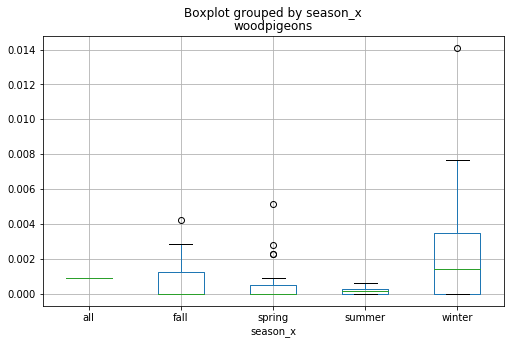

In [31]:
dtm_meta.boxplot('woodpigeons',by='season_x',figsize=(8,5))

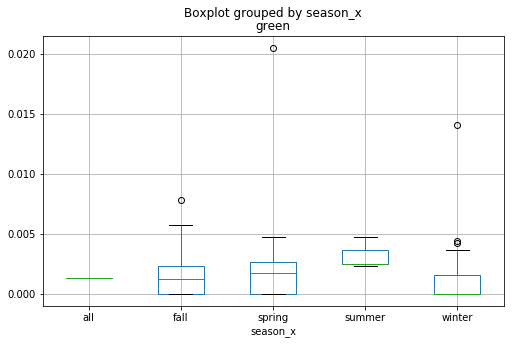

In [32]:
dtm_meta.boxplot('green',by='season_x',figsize=(8,5))

Some concluding thoughts

<h3> TF-IDF </h3>

In [33]:
# set a given word?
given_word='glided'

In [34]:
# We already have that calculated here:
tf_series = dtm[given_word]
tf_series.sort_values(ascending=False)

fn
dec-2.txt     0.007576
mar-22.txt    0.005155
mar-9.txt     0.005102
oct-29.txt    0.004796
oct-7.txt     0.004451
mar-10.txt    0.003831
dec-17.txt    0.003755
mar-21.txt    0.003722
nov-9.txt     0.003490
oct-23.txt    0.002865
                ...   
mar-15.txt    0.000000
mar-7.txt     0.000000
mar-16.txt    0.000000
mar-20.txt    0.000000
mar-27.txt    0.000000
mar-29.txt    0.000000
mar-30.txt    0.000000
mar-5.txt     0.000000
mar-6.txt     0.000000
apr-2.txt     0.000000
Name: glided, Length: 113, dtype: float64

In [35]:
# Get the number of documents
num_docs = len(dtm)
num_docs

113

In [36]:
# Get the number of documents a given word appears
dtm[dtm[given_word]>0][given_word]

fn
apr-3.txt               0.001239
apr-4.txt               0.001129
apr.txt                 0.000937
dec-15.txt              0.001083
dec-17.txt              0.003755
dec-2.txt               0.007576
dec-21.txt              0.001513
dec-22.txt              0.001049
dec-jan-feb.txt         0.000604
dec.txt                 0.000641
                          ...   
oct-23.txt              0.002865
oct-24.txt              0.002257
oct-26.txt              0.002710
oct-29.txt              0.004796
oct-7.txt               0.004451
oct-8.txt               0.002513
oct-9.txt               0.002703
oct-nov.txt             0.001099
oct.txt                 0.001443
the-hunting-life.txt    0.000954
Name: glided, Length: 51, dtype: float64

In [37]:
num_docs_with_word=len(dtm[dtm[given_word]>0])

In [38]:
import numpy as np
idf = np.log(num_docs/num_docs_with_word)
idf

0.7955621859880149

In [39]:
tfidf_series = tf_series * idf
tfidf_series.sort_values(ascending=False)

fn
dec-2.txt     0.006027
mar-22.txt    0.004101
mar-9.txt     0.004059
oct-29.txt    0.003816
oct-7.txt     0.003541
mar-10.txt    0.003048
dec-17.txt    0.002987
mar-21.txt    0.002961
nov-9.txt     0.002777
oct-23.txt    0.002280
                ...   
mar-15.txt    0.000000
mar-7.txt     0.000000
mar-16.txt    0.000000
mar-20.txt    0.000000
mar-27.txt    0.000000
mar-29.txt    0.000000
mar-30.txt    0.000000
mar-5.txt     0.000000
mar-6.txt     0.000000
apr-2.txt     0.000000
Name: glided, Length: 113, dtype: float64

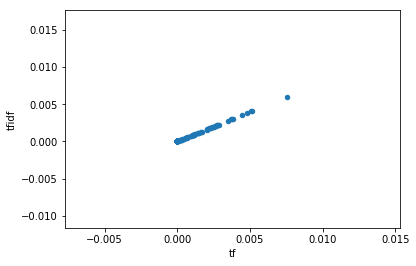

In [40]:
pd.DataFrame({'tfidf':tfidf_series, 'tf':tf_series}).plot(x='tf',y='tfidf',kind='scatter')

In [41]:
# make
def to_tfidf(dtm):
    # list of dictionaries
    dtm_tfidf = pd.DataFrame()
    
    for word in dtm.columns:
        # tf
        tf_series = dtm[word]
        
        # idf
        num_docs = len(dtm)
        num_docs_with_word=len(dtm[dtm[word]>0])
        idf=np.log(num_docs/num_docs_with_word)
        
        # tfidf
        tfidf_series = tf_series * idf
        dtm_tfidf[word]=tfidf_series
    
    return dtm_tfidf

In [42]:
dtm_tfidf=to_tfidf(dtm)
dtm_tfidf

,like,wings,flew,hawk,sky,away,air,peregrine,wind,white,...,tribes,molten,pondered,shoaled,thinning,cook-a-do,pintail,elegance,narrow-necked,tree-fringed
fn,,,,,,,,,,,,,,,,,,,,,
apr-2.txt,0.000563,0.000738,0.000000,0.000000,0.000000,0.001030,0.000839,0.001030,0.000000,0.000671,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
apr-3.txt,0.000617,0.000404,0.001212,0.000282,0.000564,0.001410,0.000000,0.001410,0.000382,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
apr-4.txt,0.000187,0.000552,0.000552,0.001541,0.001284,0.001027,0.000000,0.001027,0.001741,0.001004,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
apr.txt,0.000428,0.000535,0.000687,0.000746,0.000746,0.001173,0.000174,0.001173,0.000867,0.000556,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dec-1.txt,0.000531,0.001044,0.001461,0.000583,0.001457,0.001166,0.001424,0.001457,0.000790,0.000759,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dec-10.txt,0.001348,0.000000,0.001177,0.001232,0.000822,0.000000,0.000000,0.001232,0.001114,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dec-12.txt,0.000499,0.001225,0.001470,0.001710,0.000342,0.000513,0.001114,0.001026,0.001159,0.000446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dec-15.txt,0.000809,0.001413,0.001060,0.001726,0.001233,0.000493,0.002410,0.001233,0.002674,0.000964,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
dec-17.txt,0.000519,0.001224,0.000816,0.001139,0.001424,0.000285,0.002320,0.000285,0.002703,0.002227,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [43]:
word='drifted'
dtm[word].nlargest(10)

fn
mar-9.txt     0.005102
oct-20.txt    0.005034
dec-3.txt     0.004000
mar-16.txt    0.003774
dec-8.txt     0.003597
nov-2.txt     0.003390
oct-3.txt     0.003185
dec-22.txt    0.003148
dec-21.txt    0.003026
oct-23.txt    0.002865
Name: drifted, dtype: float64

In [44]:
dtm_tfidf[word].nlargest(10)

fn
mar-9.txt     0.003960
oct-20.txt    0.003907
dec-3.txt     0.003105
mar-16.txt    0.002929
dec-8.txt     0.002792
nov-2.txt     0.002631
oct-3.txt     0.002472
dec-22.txt    0.002443
dec-21.txt    0.002348
oct-23.txt    0.002224
Name: drifted, dtype: float64

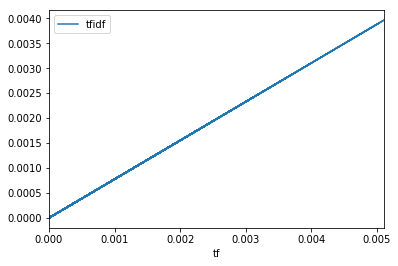

In [45]:
pd.DataFrame({'tf':dtm[word], 'tfidf':dtm_tfidf[word]}).plot(x='tf',y='tfidf')

In [46]:
fn='dec-15.txt'
dtm_tfidf.loc[fn].nlargest(10)

gale          0.005470
warning       0.004859
pigeons       0.004686
love          0.004686
wild          0.004204
fell          0.004187
flinging      0.003981
brook         0.003802
vertically    0.003647
heaved        0.003620
Name: dec-15.txt, dtype: float64

In [47]:
dtm.loc[fn].nlargest(10)

like         0.009751
wings        0.008667
wind         0.008667
hawk         0.007584
flew         0.006501
air          0.006501
sky          0.005417
peregrine    0.005417
dark         0.005417
trees        0.004334
Name: dec-15.txt, dtype: float64

In [48]:
fn='apr-4.txt'
dtm_tfidf.loc[fn].nlargest(10)

wall        0.007675
inland      0.006463
breathe     0.005474
look        0.005072
bunting     0.005062
spring      0.004847
comes       0.004605
sea-wall    0.004379
hoping      0.004276
wire        0.004276
Name: apr-4.txt, dtype: float64

In [49]:
n_words = 10
for index in reversed(dtm_tfidf.index):
    # get row for this index
    row=dtm_tfidf.loc[index]
    
    # get the lagest words
    top_words_series=row.nlargest(n_words)
    top_words_list=list(top_words_series.index)
    top_words_str=', '.join(top_words_list)
    
    # print
    print('##',index.upper())
    print(top_words_str)
    print()

## THE-HUNTING-LIFE.TXT
snow, orchard, march, falcon, river, december, october, brook, gulls, tiercel

## OCT.TXT
waders, crows, starlings, inland, river, plough, gulls, dunlin, field, airk

## OCT-NOV.TXT
waders, starlings, river, gulls, crows, plover, inland, falcon, stubble, lapwings

## OCT-9.TXT
fog, learnt, jays, eight, mobbed, acorn, meat, acrid, abound, breeding

## OCT-8.TXT
airk, waders, inland, turnstones, dunlin, walked, long-billed, frieze, rained, jostling

## OCT-7.TXT
length, tern, cars, peregrines, teeth, eating, gave, twice, falcon, catch

## OCT-5.TXT
kestrel, orchard, stubble, partridges, deepening, spiral, strike, curlew, brook, gale

## OCT-30.TXT
loneliness, desolation, stubbled, explosive, lanes, elms, leaves, lived, diminishes, peculiar

## OCT-3.TXT
beach, waders, sanderling, beaches, sea, faced, inland, flashing, tide, stolid

## OCT-29.TXT
crows, plough, starlings, river-bank, spoor, spend, arrowed, black-brown, grin, scrabbling

## OCT-28.TXT
inland, woodco

<h3> Some reflections </h3>
The tf-idf

<h3> Going forward... </h3>
<i>Write a paragraph about your research plans for the remainder of the course.
What are you hoping to accomplish in your final project?
Which research question(s) are guiding you?
Now that we have a better sense of what's possible, what findings and visualizations are you hoping to produce?
What do you hope to accomplish next week as we work on our projects in class?
(Answering these questions will help us be maximally productive next week.)</i>